# Group Project: Heart Attach Analysis & Prediction
### By: Halee Staggs, Vicky van der Wagt, Jesse Gutierrez

Code URL: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?resource=download 

#### Dataset Summary Breakdown

**Age** : Age of the patient

**Sex** : Sex of the patient

**exang**: exercise induced angina (1 = yes; 0 = no)

**ca**: number of major vessels (0-3)

**cp**: Chest Pain type chest pain type

**Value 1**: typical angina

**Value 2**: atypical angina

**Value 3**: non-anginal pain

**Value 4**: asymptomatic

**trtbps**: resting blood pressure (in mm Hg)

**chol**: cholestoral in mg/dl fetched via BMI sensor

**fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

**rest_ecg**: resting electrocardiographic results

**Value 0**: normal

**Value 1**: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

**Value 2**: showing probable or definite left ventricular hypertrophy by Estes' criteria

**thalach**: maximum heart rate achieved

**target**: 0= less chance of heart attack 1= more chance of heart attack

In [16]:
# I installed this in the terminal: conda install -c r r-essentials, conda install -c r rpy2, pip install tzlocal, pip install --upgrade rpy2, & pip install --force-reinstall cffi
# Had to load the following command to generate R in my vs code jupyter notebook
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [19]:
%%R
# Loaded the dataset which was downloaded through Kaggle
data <- read.csv('/Users/jesse/Desktop/School/University of San Diego/ADS 502- Applied Data Mining/Group Project/heart.csv')
head(data)

  age sex cp trtbps chol fbs restecg thalachh exng oldpeak slp caa thall output
1  63   1  3    145  233   1       0      150    0     2.3   0   0     1      1
2  37   1  2    130  250   0       1      187    0     3.5   0   0     2      1
3  41   0  1    130  204   0       0      172    0     1.4   2   0     2      1
4  56   1  1    120  236   0       1      178    0     0.8   2   0     2      1
5  57   0  0    120  354   0       1      163    1     0.6   2   0     2      1
6  57   1  0    140  192   0       1      148    0     0.4   1   0     1      1


In [4]:
%%R
# Sought to identify the total observations & attributes of the DS
dim(data)

[1] 303  14


In [21]:
%%R
# Wanted to see if there was any null values
colSums(is.na(data))

     age      sex       cp   trtbps     chol      fbs  restecg thalachh 
       0        0        0        0        0        0        0        0 
    exng  oldpeak      slp      caa    thall   output 
       0        0        0        0        0        0 


In [13]:
%%R
# Wanted to see if there were any corr. w/ output & the other attributes
cor(data, data$output)

                [,1]
age      -0.22543872
sex      -0.28093658
cp        0.43379826
trtbps   -0.14493113
chol     -0.08523911
fbs      -0.02804576
restecg   0.13722950
thalachh  0.42174093
exng     -0.43675708
oldpeak  -0.43069600
slp       0.34587708
caa      -0.39172399
thall    -0.34402927
output    1.00000000


In [39]:
%%R
# Downloaded necessary package to split dataset
library(caret)
# Split the data by 80% test & 20% train
index <- createDataPartition(data$output, p = 0.8, list = FALSE)
# Subset for training data
training_data <- data[index, ] 
# Subset for test data
test_data <- data[-index, ] 

# Print out the dimensions for training & test subsets
print(paste('Training data dimensions:', paste(dim(training_data), collapse = " x ")))
print(paste('Test data dimensions:', paste(dim(test_data), collapse = " x ")))

[1] "Training data dimensions: 243 x 14"
[1] "Test data dimensions: 60 x 14"


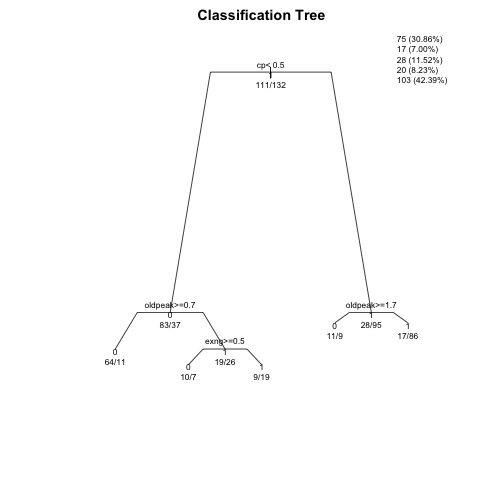

In [41]:
%%R
# Load required library
library(rpart)

# Create the formula for the decision tree based on assigned variables
formula <- output ~ thalachh + cp + exng + oldpeak

# Build decision tree model
cart_model <- rpart(formula, data = training_data, method = "class")

# Had the adjust the dimensions of decision tree as it was too crammed
par(mar=c(5,5,2,2))
plot(cart_model, main="Classification Tree", cex=0.7, margin=0.1, branch=0.6)
text(cart_model, use.n=TRUE, all=TRUE, cex=0.7)

# In these sets of codes, it added number of observations in each leaf
n_leaf <- table(cart_model$where)
n_leaf_pct <- paste0(sprintf("%.2f", prop.table(n_leaf)*100), "%")
n_leaf_text <- paste0(n_leaf, " (", n_leaf_pct, ")")
legend("topright", legend=n_leaf_text, bty="n", cex=0.7)

# Predict on test data
y_pred <- predict(cart_model, training_data, type = "class")

In [49]:
%%R
# Applied model on test data
predict_data <- predict(cart_model, test_data, type = 'class')

# Created a table to determine the accuracy of the model
output <- table(test_data$output, predict_data)
output

   predict_data
     0  1
  0 19  8
  1  3 30


In [57]:
%%R
# Calculate the accuracy of the created model
accuracy <- round((sum(diag(output)) / sum(output)) * 100, 4)
print(paste('The accuracy of the model is:', paste(accuracy), paste('%'), collapse = ' x '))

[1] "The accuracy of the model is: 81.6667 %"
